In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
titanic_test = pd.read_csv('datasets/titanic/test.csv')
titanic_train = pd.read_csv('datasets/titanic/train.csv')

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
num_attribs = ['Age','Fare','Pclass','SibSp','Parch']
cat_attribs = ["Sex",'Embarked']

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median')
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [66]:
titanic_prep=preprocessing.fit_transform(titanic_train)
titanic_test_prep=preprocessing.fit_transform(titanic_test)

In [64]:
titanic_train_1=pd.DataFrame(
    titanic_prep,
    columns=preprocessing.get_feature_names_out(),
    index=titanic_train.index)
titanic_Y=titanic_train['Survived']

In [68]:
titanic_test_prep

array([[34.5   ,  7.8292,  3.    , ...,  0.    ,  1.    ,  1.    ],
       [47.    ,  7.    ,  3.    , ...,  0.    ,  0.    ,  2.    ],
       [62.    ,  9.6875,  2.    , ...,  0.    ,  1.    ,  1.    ],
       ...,
       [38.5   ,  7.25  ,  3.    , ...,  0.    ,  1.    ,  2.    ],
       [27.    ,  8.05  ,  3.    , ...,  0.    ,  1.    ,  2.    ],
       [27.    , 22.3583,  3.    , ...,  1.    ,  1.    ,  0.    ]])

In [65]:
titanic_train_1

,num__Age,num__Fare,num__Pclass,num__SibSp,num__Parch,cat__Sex,cat__Embarked
0,22.0,7.2500,3.0,1.0,0.0,1.0,2.0
1,38.0,71.2833,1.0,1.0,0.0,0.0,0.0
2,26.0,7.9250,3.0,0.0,0.0,0.0,2.0
3,35.0,53.1000,1.0,1.0,0.0,0.0,2.0
4,35.0,8.0500,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...
886,27.0,13.0000,2.0,0.0,0.0,1.0,2.0
887,19.0,30.0000,1.0,0.0,0.0,0.0,2.0
888,28.0,23.4500,3.0,1.0,2.0,0.0,2.0
889,26.0,30.0000,1.0,0.0,0.0,1.0,0.0


array([[<Axes: title={'center': 'num__Survived'}>,
        <Axes: title={'center': 'num__Age'}>,
        <Axes: title={'center': 'num__Fare'}>],
       [<Axes: title={'center': 'num__Pclass'}>,
        <Axes: title={'center': 'num__SibSp'}>,
        <Axes: title={'center': 'num__Parch'}>],
       [<Axes: title={'center': 'cat__Sex'}>,
        <Axes: title={'center': 'cat__Embarked'}>, <Axes: >]],
      dtype=object)

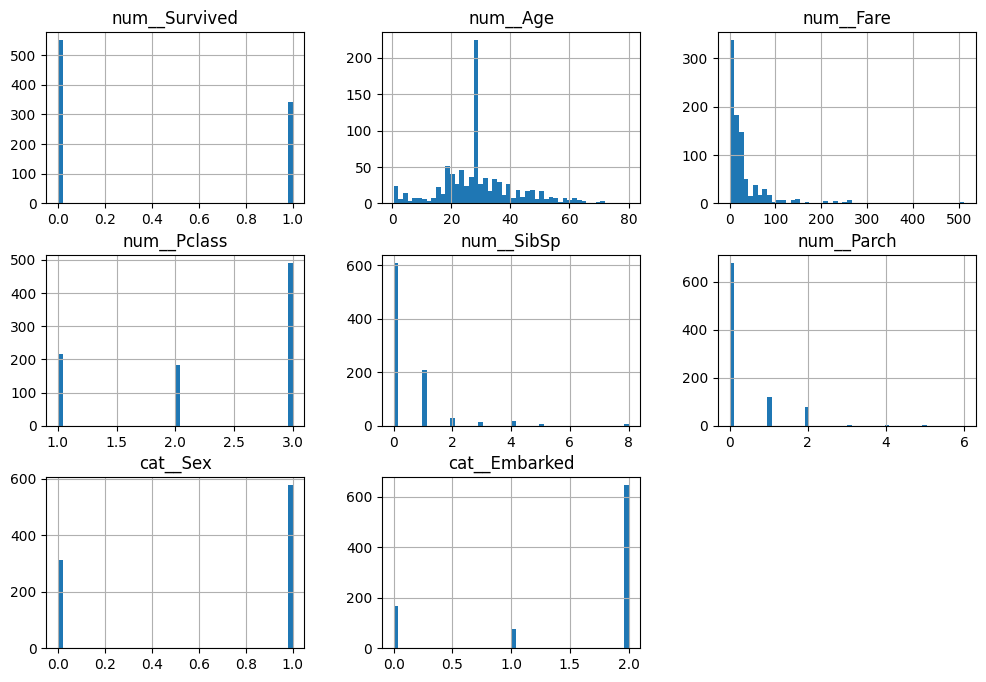

In [ ]:
titanic_prep_df.hist(bins=50, figsize=(12, 8))

In [ ]:
titanic_prep_df.corr(numeric_only=True)

,num__Survived,num__Age,num__Fare,num__Pclass,num__SibSp,num__Parch,cat__Sex,cat__Embarked
num__Survived,1.000000,-0.064910,0.257307,-0.338481,-0.035322,0.081629,-0.543351,-0.167675
num__Age,-0.064910,1.000000,0.096688,-0.339898,-0.233296,-0.172482,0.081163,-0.018754
num__Fare,0.257307,0.096688,1.000000,-0.549500,0.159651,0.216225,-0.182333,-0.224719
num__Pclass,-0.338481,-0.339898,-0.549500,1.000000,0.083081,0.018443,0.131900,0.162098
num__SibSp,-0.035322,-0.233296,0.159651,0.083081,1.000000,0.414838,-0.114631,0.068230
num__Parch,0.081629,-0.172482,0.216225,0.018443,0.414838,1.000000,-0.245489,0.039798
cat__Sex,-0.543351,0.081163,-0.182333,0.131900,-0.114631,-0.245489,1.000000,0.108262
cat__Embarked,-0.167675,-0.018754,-0.224719,0.162098,0.068230,0.039798,0.108262,1.000000


<Axes: xlabel='num__Age', ylabel='num__Survived'>

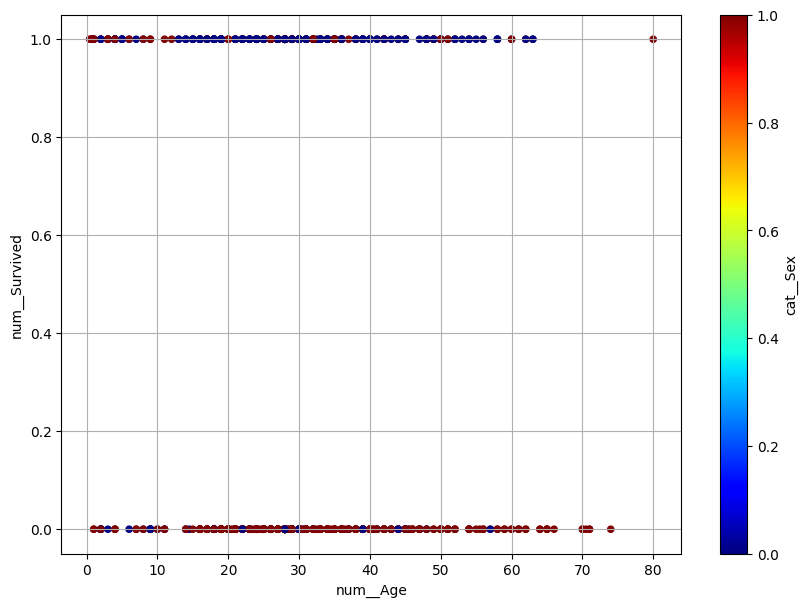

In [50]:
titanic_prep_df.plot(kind="scatter", x="num__Age", y="num__Survived", grid=True,
             c="cat__Sex", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

In [55]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(titanic_train_1,titanic_Y)

SGDClassifier()

In [94]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
cross_val_score(sgd_clf,titanic_train_1,titanic_Y,cv=5,scoring="accuracy")

array([0.75418994, 0.67977528, 0.64606742, 0.71910112, 0.61235955])

In [95]:
y_train_pred=cross_val_predict(sgd_clf,titanic_train_1,titanic_Y,cv=3)
cm=confusion_matrix(titanic_Y,y_train_pred)

In [96]:
cm

array([[367, 182],
       [143, 199]], dtype=int64)

In [81]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(titanic_train_1,titanic_Y)

DummyClassifier()

In [82]:
cross_val_score(dummy_clf,titanic_train_1,titanic_Y,cv=5,scoring="accuracy")

array([0.61452514, 0.61797753, 0.61797753, 0.61797753, 0.61235955])

In [77]:
sgd_clf.predict(titanic_test_prep)

c:\Users\ploje\OneDrive\Dokumenty\GitHub\handson-ml3\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.